# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import re

%matplotlib inline



In [2]:
df = pd.read_csv('project time_series_covid_19_confirmed.csv')
df1 = df.copy()

In [3]:
df1.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817


In [4]:
df1.shape

(266, 208)

In [5]:
df1.drop(['Province/State','Lat','Long'], inplace= True, axis = 1)

In [6]:
df1.head(2)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,Albania,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817


In [7]:
df1.info() #verifying datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 205 entries, Country/Region to 8/12/20
dtypes: int64(204), object(1)
memory usage: 426.1+ KB


In [8]:
df1.shape 

(266, 205)

In [9]:
df1 = df1.groupby(['Country/Region']).agg(sum) #groupby using 'Country/Region' and sum all rows using agg()
df1.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
Albania,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817


In [10]:
df1.shape

(188, 204)

# SECTION 2 

In [11]:
df2 = df1.copy()
df2.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
Albania,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817


In [12]:
df2['max_infection_rate'] = df2.diff(axis = 1).max(axis = 1).to_frame() #using diff() to find difference between values in columns
df2.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,141.0


In [13]:
corona_data = df2[['max_infection_rate']] #creating new dataframe as 'corona_data' using max_infection_rate column
corona_data.head(3)

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,141.0
Algeria,675.0


In [14]:
corona_data.shape

(188, 1)

# SECTION 4

In [15]:
happiness_report = pd.read_csv('projecct worldwide_happiness_report.csv') #reading csv file
happiness_report.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [16]:
happiness_report_1 = happiness_report.copy()
happiness_report_1.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [17]:
happiness_report_1.drop(['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption'],axis = 1, inplace = True) #droping columns

## RENAMING COLUMN

In [18]:
happiness_report_1.rename(columns = {'Country or region':'Country/Region'},inplace = True)#using rename() command to rename column name

In [19]:
happiness_report_1.head(3)

,Country/Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603


In [20]:
happiness_report_1.set_index('Country/Region',inplace = True)# set country/region as index

In [21]:
happiness_report_1.head(3)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603


In [22]:
happiness_report_1.index.nunique() #no.of unique countries in happiness_report

156

# MERGING CORONA_DATA AND MAX_INFECTION_RATE

In [23]:
corona_data.head(2)

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,141.0


In [24]:
corona_data.shape 

(188, 1)

In [25]:
corona_data.dtypes

max_infection_rate    float64
dtype: object

In [26]:
happiness_report_1.head(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592


In [27]:
happiness_report_1.shape

(156, 4)

In [28]:
happiness_report_1.dtypes

GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
dtype: object

## CREATING NEW DATAFRAME 

In [29]:
data = pd.merge(corona_data,happiness_report_1,how = 'inner',left_index = True, right_index = True)
data

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,1150.0,0.960,1.427,0.805,0.154
Vietnam,50.0,0.741,1.346,0.851,0.543
Yemen,116.0,0.287,1.163,0.463,0.143


In [30]:
data.shape

(144, 5)

## CORRELATION AMONG ALL VARIABLES

In [31]:
data.corr(method= 'pearson') # using pearson method 

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.100475,0.067720,0.088250,0.088359
GDP per capita,0.100475,1.000000,0.757521,0.859431,0.394799
Social support,0.067720,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.088250,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.088359,0.394799,0.456317,0.423146,1.000000


In [32]:
data.corr(method = 'kendall') #using kendall method

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.222870,0.170190,0.194246,0.096479
GDP per capita,0.222870,1.000000,0.580595,0.664590,0.286201
Social support,0.170190,0.580595,1.000000,0.560188,0.330269
Healthy life expectancy,0.194246,0.664590,0.560188,1.000000,0.314477
Freedom to make life choices,0.096479,0.286201,0.330269,0.314477,1.000000


In [33]:
data.corr(method = 'spearman') #using spearman method

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.338158,0.242662,0.289974,0.153488
GDP per capita,0.338158,1.000000,0.779107,0.855781,0.411389
Social support,0.242662,0.779107,1.000000,0.759140,0.458597
Healthy life expectancy,0.289974,0.855781,0.759140,1.000000,0.446371
Freedom to make life choices,0.153488,0.411389,0.458597,0.446371,1.000000


# SECTION 4

In [34]:
cd = pd.read_csv('lat ang long countries.csv') #import latitude and longitude csv file
cd.head(3)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan


In [35]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [36]:
cd.dtypes

country       object
latitude     float64
longitude    float64
name          object
dtype: object

In [37]:
cd.drop('country',inplace = True,axis = 1) # droping country column

In [38]:
cd.head(1)

,latitude,longitude,name
0,42.546245,1.601554,Andorra


In [39]:
cd = cd.rename(columns = {'name':'Country/Region'}) # rename column 'name' as 'Country/Region'

In [40]:
cd.head(2)

,latitude,longitude,Country/Region
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates


In [41]:
cd.set_index('Country/Region',inplace = True)

In [42]:
cd.head()

,latitude,longitude
Country/Region,,
Andorra,42.546245,1.601554
United Arab Emirates,23.424076,53.847818
Afghanistan,33.939110,67.709953
Antigua and Barbuda,17.060816,-61.796428
Anguilla,18.220554,-63.068615


In [43]:
cd.shape

(245, 2)

In [44]:
final_data = pd.merge(data, cd, how = 'inner',left_index = True, right_index = True)
final_data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,latitude,longitude
Country/Region,,,,,,,
Afghanistan,915.0,0.350,0.517,0.361,0.000,33.939110,67.709953
Albania,141.0,0.947,0.848,0.874,0.383,41.153332,20.168331
Algeria,675.0,1.002,1.160,0.785,0.086,28.033886,1.659626
Argentina,7663.0,1.092,1.432,0.881,0.471,-38.416097,-63.616672
Armenia,771.0,0.850,1.055,0.815,0.283,40.069099,45.038189


In [45]:
final_data.shape

(140, 7)

In [46]:
pd.set_option('display.max_rows',None)

In [47]:
final_data.dtypes


max_infection_rate              float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
latitude                        float64
longitude                       float64
dtype: object

In [48]:
final_data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,latitude,longitude
Country/Region,,,,,,,
Afghanistan,915.0,0.350,0.517,0.361,0.000,33.939110,67.709953
Albania,141.0,0.947,0.848,0.874,0.383,41.153332,20.168331
Algeria,675.0,1.002,1.160,0.785,0.086,28.033886,1.659626
Argentina,7663.0,1.092,1.432,0.881,0.471,-38.416097,-63.616672
Armenia,771.0,0.850,1.055,0.815,0.283,40.069099,45.038189


In [49]:
location = final_data[['latitude','longitude']]
loc = location.values.tolist()
loc

[[33.93911, 67.709953],
 [41.153332, 20.168331],
 [28.033886, 1.6596259999999998],
 [-38.416097, -63.616671999999994],
 [40.069099, 45.038189],
 [-25.274398, 133.775136],
 [47.516231, 14.550072],
 [40.143105, 47.576927000000005],
 [25.930414000000003, 50.637772],
 [23.684994, 90.35633100000001],
 [53.709807, 27.953389],
 [50.503887, 4.469936],
 [9.30769, 2.315834],
 [27.514162, 90.433601],
 [-16.290154, -63.588653],
 [43.915886, 17.679076000000002],
 [-22.328474, 24.684866],
 [-14.235004, -51.92528],
 [42.733883, 25.48583],
 [12.238333, -1.561593],
 [-3.3730559999999996, 29.918885999999997],
 [12.565679, 104.990963],
 [7.369722, 12.354722],
 [56.130366, -106.34677099999999],
 [6.611111, 20.939444],
 [15.454166, 18.732207],
 [-35.675146999999996, -71.542969],
 [35.86166, 104.195397],
 [4.570868, -74.297333],
 [-11.875001, 43.872219],
 [9.748917, -83.753428],
 [45.1, 15.2],
 [35.126413, 33.429859],
 [56.26392, 9.501785],
 [18.735692999999998, -70.162651],
 [-1.8312389999999998, -78.18340

In [50]:
final_data.index.nunique()

140

In [51]:
final_data.shape

(140, 7)

# visualization using Folium 

In [52]:
from branca.element import Figure
fig=Figure(width=850,height=350)
m1=folium.Map(zoom_start = 20,tiles ='stamenterrain' )
fig.add_child(m1)
folium.TileLayer('Stamen Terrain').add_to(m1)
folium.TileLayer('Stamen Toner').add_to(m1)
folium.TileLayer('Stamen Water Color').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.LayerControl().add_to(m1) #layer control provides the icon in top right corner
for i in range(0, len(loc)):
    folium.Marker(loc[i], popup="<strong>"+final_data.iloc[i].name+"</strong>"+
        "<li>max_infection_rate:"+str(final_data.iloc[i]['max_infection_rate'])+"</li>"+
        "<li>Social support:"+str(final_data.iloc[i]['Social support'])+"</li>"+
        "<li>Freedom to make life choices:"+str(final_data.iloc[i]['Freedom to make life choices'])+"</li>"+
        "<li>Healthy life expectancy:"+str(final_data.iloc[i]['Healthy life expectancy'])+"</li>",tooltip ='<strong style="color:red;"><li style = "color:black;">Country name:</li>'+final_data.index[i]+'</strong>' +'<li>click to see more details</li>',  
        icon=folium.Icon(color='darkred', icon_color='white', icon='heartbeat', angle=10, prefix='fa'),
        draggable = True).add_to(m1)

m1

# section 5

In [53]:
_indi = final_data.drop(['latitude','longitude'],axis = 1)
_indi.head(3)

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086


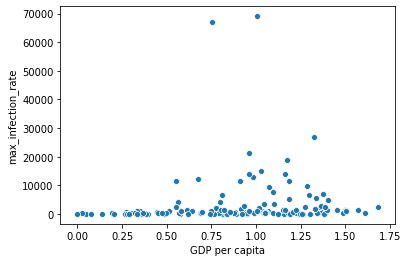

In [54]:
sns.scatterplot(data =_indi, x="GDP per capita", y="max_infection_rate"); #using scatterplot to define relation between two variables

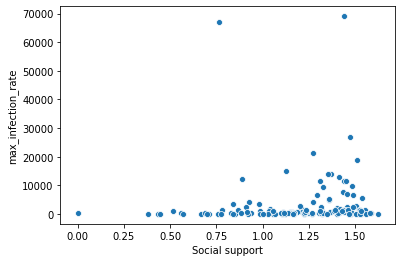

In [55]:
sns.scatterplot(data =_indi, x="Social support", y="max_infection_rate"); #using scatterplot to define relation between two variables

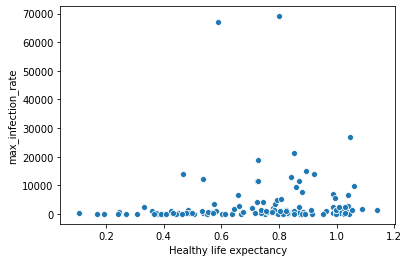

In [56]:
sns.scatterplot(data =_indi, x="Healthy life expectancy", y="max_infection_rate"); #using scatterplot to define relation between two variables

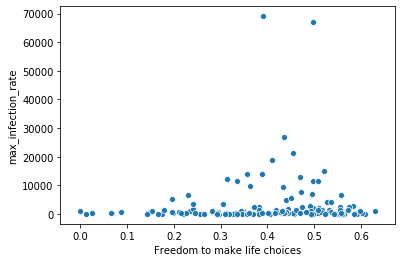

In [57]:
sns.scatterplot(data =_indi, x="Freedom to make life choices", y="max_infection_rate"); #using scatterplot to define relation between two variables